# Supplementary figure - genetic, new cell line

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os.path as osp
from glob import glob
import sys
sys.path.append('../../')
from constants import *
import os
import numpy as np
from scipy import stats



outdir = 'processed'
os.makedirs(outdir, exist_ok = True)

In [2]:
base_path = '../../../results_metrics_aggregated_bme/perturbagen_pred'

In [3]:
##########
#Mechanistic baselines
##########
df = pd.read_csv(osp.join(base_path, 'baselines/genetic_cross.csv'))
df['Metric'] = df['Metric'].replace('ranking score', 'rankings')

# Initialize an empty dictionary
performance = {}

# Iterate over the rows of the DataFrame
for _, row in df.iterrows():
    metric = row['Metric']
    baseline = row['Baseline']
    if baseline == 'random': baseline = "Random"
    if baseline == 'cancer_targets': baseline = "Cancer targets"
    if baseline == 'cancer_genes': baseline = "Cancer genes"
    cellline = row['Cellline']
    folds = [row['Fold 1'], row['Fold 2'], row['Fold 3'], row['Fold 4'], row['Fold 5']]
    
    # Initialize nested dictionaries if not already present
    if cellline not in performance:
        performance[cellline] = {}
    if metric not in performance[cellline]:
        performance[cellline][metric] = {}
    if baseline not in performance[cellline][metric]:
        performance[cellline][metric][baseline] = []
    
    # Add the folds data to the dictionary
    performance[cellline][metric][baseline] = folds

# Print the resulting dictionary
# import pprint
# pprint.pprint(performance)

In [4]:
##########
#Biolord
##########

paths = glob(osp.join(base_path, 'Biolord/cross/biolord_genetic_r2_*_topk.csv'))

for path in paths:
    df = pd.read_csv(path)
    # Process the new DataFrame to update the dictionary
    method_name = 'Biolord'

    # List the columns for which you want to compute the mean
    columns_of_interest = ['recall_at_1', 'recall_at_10', 'recall_at_100', 
                        'recall_at_1000', 'rankings', 'perc_partially_accurate_predictions']

    # Group by 'cellline2' and calculate the mean for the specified columns
    df_grouped = df.groupby('cellline2')[columns_of_interest].mean().reset_index()

    # Iterate over the rows of the new DataFrame
    for _, row in df_grouped.iterrows():
        cellline = row['cellline2']
        
        metric_data = {
            'recall@1': row['recall_at_1'],
            'recall@10': row['recall_at_10'],
            'recall@100': row['recall_at_100'],
            'recall@1000': row['recall_at_1000'],
            'percentage of samples with partially accurate predictions': row['perc_partially_accurate_predictions'],
            'rankings': row['rankings']
        }
        
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name].append(value)


In [5]:
##########
#CellOT
##########

paths = glob(osp.join(base_path, 'cellOT/cross/cellot_genetic_r2_*_topk.csv'))

for path in paths:
    df = pd.read_csv(path)
    # Process the new DataFrame to update the dictionary
    method_name = 'CellOT'

    # List the columns for which you want to compute the mean
    columns_of_interest = ['recall_at_1', 'recall_at_10', 'recall_at_100', 
                        'recall_at_1000', 'rankings', 'perc_partially_accurate_predictions']

    # Group by 'cellline2' and calculate the mean for the specified columns
    df_grouped = df.groupby('cellline2')[columns_of_interest].mean().reset_index()

    # Iterate over the rows of the new DataFrame
    for _, row in df_grouped.iterrows():
        cellline = row['cellline2']
        
        metric_data = {
            'recall@1': row['recall_at_1'],
            'recall@10': row['recall_at_10'],
            'recall@100': row['recall_at_100'],
            'recall@1000': row['recall_at_1000'],
            'percentage of samples with partially accurate predictions': row['perc_partially_accurate_predictions'],
            'rankings': row['rankings']
        }
        
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name].append(value)


In [6]:
#GEARS does not predict for new cell line yet
# ##########
# #GEARS
# ##########

# paths = glob(osp.join(base_path, 'GEARS/cross/gears_genetic_r2_*_topk.csv'))

# for path in paths:
#     df = pd.read_csv(path)
#     # Process the new DataFrame to update the dictionary
#     method_name = 'GEARS'

#     # List the columns for which you want to compute the mean
#     columns_of_interest = ['recall_at_1', 'recall_at_10', 'recall_at_100', 
#                         'recall_at_1000', 'rankings', 'perc_partially_accurate_predictions']

#     # Group by 'cellline2' and calculate the mean for the specified columns
#     df_grouped = df.groupby('cellline2')[columns_of_interest].mean().reset_index()

#     # Iterate over the rows of the new DataFrame
#     for _, row in df_grouped.iterrows():
#         cellline = row['cellline2']
        
#         metric_data = {
#             'recall@1': row['recall_at_1'],
#             'recall@10': row['recall_at_10'],
#             'recall@100': row['recall_at_100'],
#             'recall@1000': row['recall_at_1000'],
#             'percentage of samples with partially accurate predictions': row['perc_partially_accurate_predictions'],
#             'rankings': row['rankings']
#         }
        
#         # Initialize nested dictionaries if not already present
#         if cellline not in performance:
#             performance[cellline] = {}
        
#         for metric, value in metric_data.items():
#             if metric not in performance[cellline]:
#                 performance[cellline][metric] = {}
#             if method_name not in performance[cellline][metric]:
#                 performance[cellline][metric][method_name] = []
#             performance[cellline][metric][method_name].append(value)


In [7]:
##########
#scGen
##########

paths = glob(osp.join(base_path, 'scGEN/cross/scgen_genetic_r2_*_topk.csv'))

for path in paths:
    df = pd.read_csv(path)
    # Process the new DataFrame to update the dictionary
    method_name = 'scGen'

    # List the columns for which you want to compute the mean
    columns_of_interest = ['recall_at_1', 'recall_at_10', 'recall_at_100', 
                        'recall_at_1000', 'rankings', 'perc_partially_accurate_predictions']

    # Group by 'cellline2' and calculate the mean for the specified columns
    df_grouped = df.groupby('cellline2')[columns_of_interest].mean().reset_index()

    # Iterate over the rows of the new DataFrame
    for _, row in df_grouped.iterrows():
        cellline = row['cellline2']
        
        metric_data = {
            'recall@1': row['recall_at_1'],
            'recall@10': row['recall_at_10'],
            'recall@100': row['recall_at_100'],
            'recall@1000': row['recall_at_1000'],
            'percentage of samples with partially accurate predictions': row['perc_partially_accurate_predictions'],
            'rankings': row['rankings']
        }
        
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name].append(value)


In [8]:
##########
#PDGrapher
##########
        
paths = glob(osp.join(base_path, 'PDgrapher/cross/genetic/val/*_drugpred_cross_best.csv'))

for path in paths:
    df = pd.read_csv(path)
    df = df[df['Set'] == 'Test']
    
    
    # Process the new DataFrame to update the dictionary
    method_name = 'PDGrapher'


    # Iterate over the rows of the new DataFrame
    for _, row in df.iterrows():
        
        if row['Cellline1'] == 'HA1E':
            continue
        
        train_cell = row['Cellline1']
        
        cellline = row['Cellline2']
        
        if cellline == train_cell:
            continue
        
        metric = row['Metric']
        if metric == 'ranking score':
            metric = 'rankings'
        value = row['Mean']
        
        
        metric_data = {
            metric: value
        }
        
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name].append(value)


In [9]:
performance['A375']['rankings'].keys()

dict_keys(['Cancer genes', 'Cancer targets', 'Random', 'Biolord', 'CellOT', 'scGen', 'PDGrapher'])

In [10]:
cell_line_to_cancer_type = {
    'A549': 'Lung-A549',
    'A375': 'Skin-A375',
    'BT20': 'Breast-BT20',
    'HELA': 'Cervix-HELA',
    'HT29': 'Colon-HT29',
    'MCF7': 'Breast-MCF7',
    'MDAMB231': 'Breast-MDAMB231',
    'PC3': 'Prostate-PC3',
    'VCAP': 'Prostate-VCAP',
    'BICR6': 'Head-BICR6',
    'U251MG': 'Brain-U251MG',
    'YAPC': 'Pancreas-YAPC',
    'ES2': 'Ovary-ES2',
    'AGS': 'Stomach-AGS'
}

## Panel proportion of partially accurate samples

/tmp/ipykernel_2106334/1583381422.py:59: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)


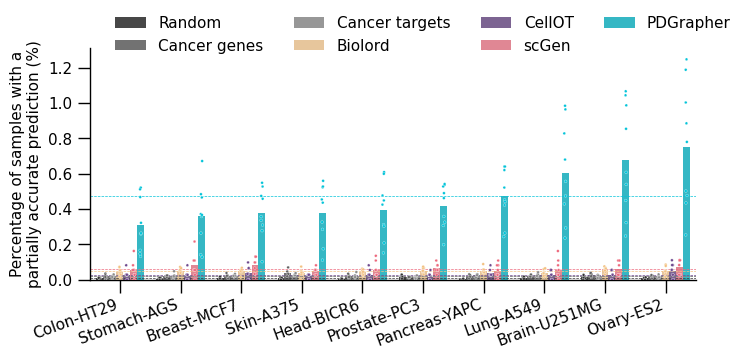

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Extract the data for 'rankings' into a DataFrame
metric = 'percentage of samples with partially accurate predictions'
data = []
for cellline, metrics in performance.items():
    if metric in metrics:
        for method, values in metrics[metric].items():
            for value in values:
                data.append([cellline, method, value])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Cell Line', 'Method', metric])

# Calculate the mean 'rankings' for each cell line and method
df_mean = df.groupby(['Cell Line', 'Method']).mean().reset_index()

# Order cell lines based on values for PDGrapher
pdgrapher_means = df_mean[df_mean['Method'] == 'PDGrapher'].sort_values(by=metric)
ordered_cell_lines = pdgrapher_means['Cell Line']

# Reorder the DataFrame based on ordered cell lines
df['Cell Line'] = pd.Categorical(df['Cell Line'], categories=ordered_cell_lines, ordered=True)
df_mean['Cell Line'] = pd.Categorical(df_mean['Cell Line'], categories=ordered_cell_lines, ordered=True)

#Rename cell lines
df['Cancer Type'] = df['Cell Line'].map(cell_line_to_cancer_type)
df_mean['Cancer Type'] = df_mean['Cell Line'].map(cell_line_to_cancer_type)
# Replace x-axis labels with cancer types
df['Cell Line'] = df['Cancer Type']
df_mean['Cell Line'] = df_mean['Cancer Type']

# Define a color palette that matches the existing figures
palette = {
    'Biolord': '#f3c283',
    'ChemCPA': '#2C70B9',
    'PDGrapher': '#04C4D9',
    'Cancer genes': '#636363',
    'Cancer targets': '#8C8C8C',
    'CellOT': '#6f4a8e',
    'Random': '#333333',
    'scGen': '#ED697D',
    'GEARS': '#228B22'
    
}

# Define the order of methods
method_order = ['Random', 'Cancer genes', 'Cancer targets', 'Biolord', 'CellOT', 'scGen', 'PDGrapher']

with sns.plotting_context(plotting_context):
    # Initialize the plot
    fig, ax = plt.subplots(figsize=(7.35, 3.4))

    # Create a bar plot for each method
    sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)

    # Overlay individual data points
    sns.stripplot(data=df, x='Cell Line', y=metric, hue='Method', palette=palette, dodge=True, jitter=True, alpha=1.0, hue_order=method_order, size=2, edgecolor="white", linewidth=0.2)





    # Add horizontal lines for the overall mean ranking for each method
    for method in method_order:
        overall_mean = df[df['Method'] == method][metric].mean()
        plt.axhline(y=overall_mean, linestyle='--', color=palette[method], linewidth=0.5)

    # Remove title
    plt.title('')
    # plt.ylim(0,5)

    # Remove X-axis label
    plt.xlabel('')
    sns.despine()

    # Adjust legend to only include the bars and place it at the top
    handles, labels = plt.gca().get_legend_handles_labels()
    bar_handles = handles[:len(method_order)]
    bar_labels = labels[:len(method_order)]
    plt.legend(bar_handles, bar_labels, bbox_to_anchor=(0.55, 1.20), loc='upper center', ncol=4, frameon=False, title=None)
    plt.subplots_adjust(right=0.95, bottom = 0.2)
    plt.xticks(rotation=20, ha="right")
    plt.ylabel('Percentage of samples with a\npartially accurate prediction (%)')
    plt.savefig(osp.join(outdir, 'panel_partially_accurate_pred.pdf'))
    plt.show()




In [12]:
df = df_mean
metric = 'percentage of samples with partially accurate predictions'
# Step 1: Filter out the data for PDGrapher
pdgrapher_df = df[df['Method'] == 'PDGrapher']

# Step 2: Identify the second-best method for each cell line
second_best_df = df[df['Method'] != 'PDGrapher'].copy()

# Group by cell line and find the second best method (highest value)
second_best_df = second_best_df.sort_values(by=['Cell Line', metric], ascending=False)
second_best_df = second_best_df.groupby('Cell Line').first().reset_index()

# Step 3: Merge the two DataFrames to compare PDGrapher with the second-best method
comparison_df = pd.merge(pdgrapher_df, second_best_df, on='Cell Line', suffixes=('_PDGrapher', '_SecondBest'))

# Step 4: Calculate the absolute difference
comparison_df['Absolute Difference'] = abs(comparison_df[metric + '_PDGrapher'] - comparison_df[metric + '_SecondBest'])

# Display the result
comparison_df = comparison_df[['Cell Line', 'Method_SecondBest', metric + '_PDGrapher', metric + '_SecondBest', 'Absolute Difference']]
comparison_df.sort_values(by = 'Absolute Difference', ascending = False)

,Cell Line,Method_SecondBest,percentage of samples with partially accurate predictions_PDGrapher,percentage of samples with partially accurate predictions_SecondBest,Absolute Difference
4,Ovary-ES2,scGen,0.752676,0.069939,0.682738
8,Brain-U251MG,scGen,0.680013,0.059866,0.620147
1,Lung-A549,scGen,0.605144,0.056888,0.548256
9,Pancreas-YAPC,Biolord,0.471815,0.049441,0.422374
7,Prostate-PC3,scGen,0.416095,0.062893,0.353201
3,Head-BICR6,scGen,0.392345,0.053894,0.338452
0,Skin-A375,scGen,0.377266,0.047931,0.329334
6,Breast-MCF7,scGen,0.376398,0.082704,0.293694
2,Stomach-AGS,scGen,0.360727,0.080819,0.279908
5,Colon-HT29,scGen,0.309649,0.053967,0.255683


## Panel ranking

/tmp/ipykernel_2106334/412111792.py:58: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)


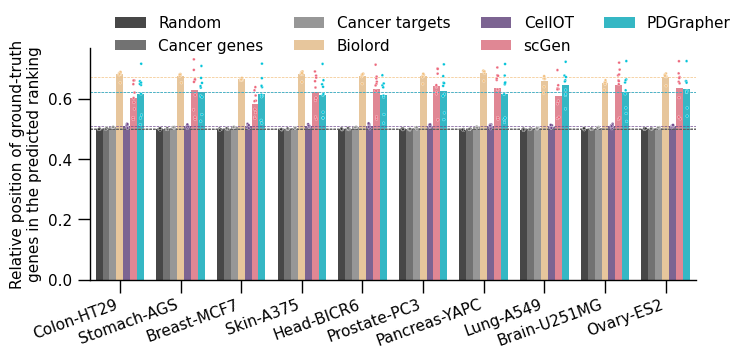

In [13]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Extract the data for 'rankings' into a DataFrame
metric = 'rankings'
data = []
for cellline, metrics in performance.items():
    if metric in metrics:
        for method, values in metrics[metric].items():
            for value in values:
                data.append([cellline, method, value])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Cell Line', 'Method', metric])

# Calculate the mean 'rankings' for each cell line and method
df_mean = df.groupby(['Cell Line', 'Method']).mean().reset_index()

# Order cell lines based on values for PDGrapher
pdgrapher_means = df_mean[df_mean['Method'] == 'PDGrapher'].sort_values(by=metric)
# ordered_cell_lines = pdgrapher_means['Cell Line']

# Reorder the DataFrame based on ordered cell lines
df['Cell Line'] = pd.Categorical(df['Cell Line'], categories=ordered_cell_lines, ordered=True)
df_mean['Cell Line'] = pd.Categorical(df_mean['Cell Line'], categories=ordered_cell_lines, ordered=True)

#Rename cell lines
df['Cancer Type'] = df['Cell Line'].map(cell_line_to_cancer_type)
df_mean['Cancer Type'] = df_mean['Cell Line'].map(cell_line_to_cancer_type)
# Replace x-axis labels with cancer types
df['Cell Line'] = df['Cancer Type']
df_mean['Cell Line'] = df_mean['Cancer Type']

# Define a color palette that matches the existing figures
palette = {
    'Biolord': '#f3c283',
    'ChemCPA': '#2C70B9',
    'PDGrapher': '#04C4D9',
    'Cancer genes': '#636363',
    'Cancer targets': '#8C8C8C',
    'CellOT': '#6f4a8e',
    'Random': '#333333',
    'scGen': '#ED697D',
    'GEARS': '#228B22'
    
}

# Define the order of methods
method_order = ['Random', 'Cancer genes', 'Cancer targets', 'Biolord', 'CellOT', 'scGen', 'PDGrapher']

with sns.plotting_context(plotting_context):
    # Initialize the plot
    fig, ax = plt.subplots(figsize=(7.35, 3.4))

    # Create a bar plot for each method
    sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)

    # Overlay individual data points
    sns.stripplot(data=df, x='Cell Line', y=metric, hue='Method', palette=palette, dodge=True, jitter=True, alpha=1.0, hue_order=method_order, size=2, edgecolor="white", linewidth=0.2)





    # Add horizontal lines for the overall mean ranking for each method
    for method in method_order:
        overall_mean = df[df['Method'] == method][metric].mean()
        plt.axhline(y=overall_mean, linestyle='--', color=palette[method], linewidth=0.5)

    # Remove title
    plt.title('')
    plt.ylim

    # Remove X-axis label
    plt.xlabel('')
    sns.despine()

    # Adjust legend to only include the bars and place it at the top
    handles, labels = plt.gca().get_legend_handles_labels()
    bar_handles = handles[:len(method_order)]
    bar_labels = labels[:len(method_order)]
    plt.legend(bar_handles, bar_labels, bbox_to_anchor=(0.55, 1.20), loc='upper center', ncol=4, frameon=False, title=None)
    plt.subplots_adjust(right=0.95, bottom = 0.2)
    plt.xticks(rotation=20, ha="right")
    plt.ylabel('Relative position of ground-truth\ngenes in the predicted ranking')
    plt.savefig(osp.join(outdir, 'panel_ranking.pdf'))
    plt.show()


In [14]:
df = df_mean
metric = 'rankings'
# Step 1: Filter out the data for PDGrapher
pdgrapher_df = df[df['Method'] == 'PDGrapher']

# Step 2: Identify the second-best method for each cell line
second_best_df = df[df['Method'] != 'PDGrapher'].copy()

# Group by cell line and find the second best method (highest value)
second_best_df = second_best_df.sort_values(by=['Cell Line', metric], ascending=False)
second_best_df = second_best_df.groupby('Cell Line').first().reset_index()

# Step 3: Merge the two DataFrames to compare PDGrapher with the second-best method
comparison_df = pd.merge(pdgrapher_df, second_best_df, on='Cell Line', suffixes=('_PDGrapher', '_SecondBest'))

# Step 4: Calculate the absolute difference
comparison_df['Absolute Difference'] = abs(comparison_df[metric + '_PDGrapher'] - comparison_df[metric + '_SecondBest'])

# Display the result
comparison_df = comparison_df[['Cell Line', 'Method_SecondBest', metric + '_PDGrapher', metric + '_SecondBest', 'Absolute Difference']]
comparison_df.sort_values(by = 'Absolute Difference', ascending = False)

,Cell Line,Method_SecondBest,rankings_PDGrapher,rankings_SecondBest,Absolute Difference
0,Skin-A375,Biolord,0.614538,0.684452,0.069913
9,Pancreas-YAPC,Biolord,0.617904,0.687672,0.069769
5,Colon-HT29,Biolord,0.616177,0.682208,0.066031
3,Head-BICR6,Biolord,0.612479,0.677185,0.064707
2,Stomach-AGS,Biolord,0.623012,0.677611,0.054598
6,Breast-MCF7,Biolord,0.617061,0.665753,0.048692
7,Prostate-PC3,Biolord,0.628354,0.675878,0.047524
4,Ovary-ES2,Biolord,0.631975,0.674468,0.042493
8,Brain-U251MG,Biolord,0.622815,0.652476,0.029661
1,Lung-A549,Biolord,0.647006,0.661766,0.014760


## Panels recall

/tmp/ipykernel_2106334/2603252047.py:51: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)


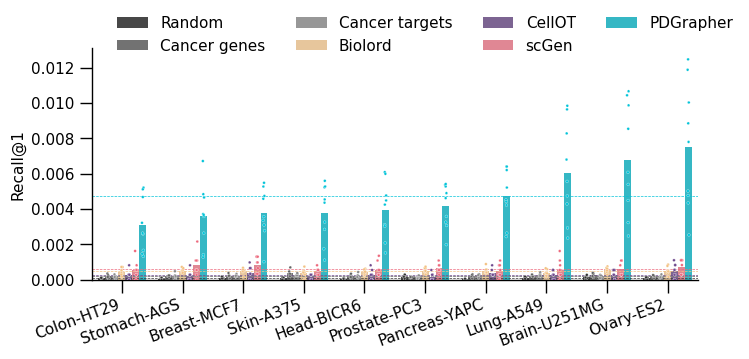

       Cell Line Method_SecondBest  recall@1_PDGrapher  recall@1_SecondBest  \
4      Ovary-ES2             scGen            0.007527             0.000699   
8   Brain-U251MG             scGen            0.006800             0.000599   
1      Lung-A549             scGen            0.006051             0.000569   
9  Pancreas-YAPC           Biolord            0.004718             0.000494   
7   Prostate-PC3             scGen            0.004161             0.000629   
3     Head-BICR6             scGen            0.003923             0.000539   
0      Skin-A375             scGen            0.003773             0.000479   
6    Breast-MCF7             scGen            0.003764             0.000827   
2    Stomach-AGS             scGen            0.003607             0.000808   
5     Colon-HT29             scGen            0.003096             0.000540   

   Absolute Difference  
4             0.006827  
8             0.006201  
1             0.005483  
9             0.004224  
7    

/tmp/ipykernel_2106334/2603252047.py:51: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)


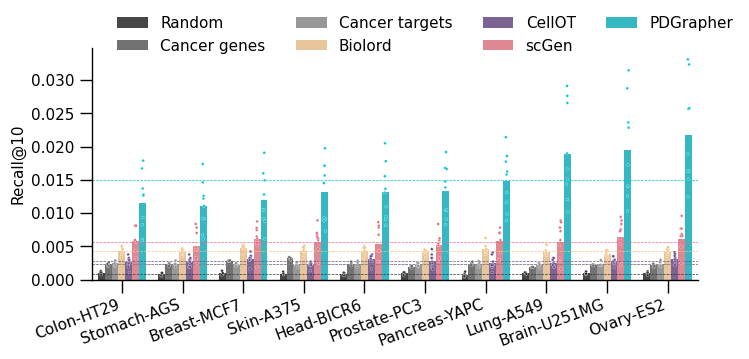

       Cell Line Method_SecondBest  recall@10_PDGrapher  recall@10_SecondBest  \
4      Ovary-ES2             scGen             0.021774              0.006082   
1      Lung-A549             scGen             0.018947              0.005689   
8   Brain-U251MG             scGen             0.019425              0.006406   
9  Pancreas-YAPC             scGen             0.014806              0.005749   
7   Prostate-PC3             scGen             0.013268              0.005241   
3     Head-BICR6             scGen             0.013124              0.005330   
0      Skin-A375             scGen             0.013184              0.005632   
2    Stomach-AGS             scGen             0.010999              0.005089   
6    Breast-MCF7             scGen             0.011973              0.006113   
5     Colon-HT29             scGen             0.011455              0.005786   

   Absolute Difference  
4             0.015693  
1             0.013258  
8             0.013020  
9       

/tmp/ipykernel_2106334/2603252047.py:51: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)


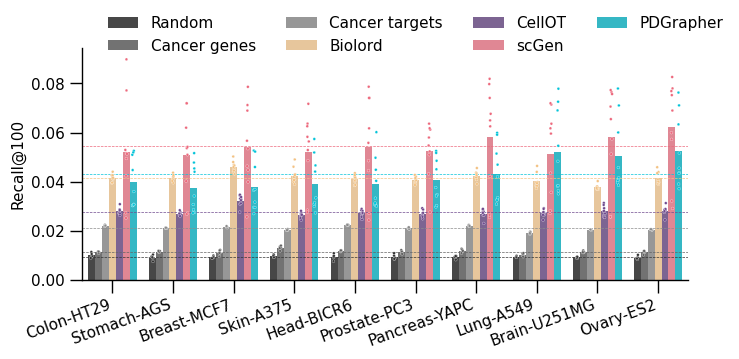

       Cell Line Method_SecondBest  recall@100_PDGrapher  \
6    Breast-MCF7             scGen              0.037919   
3     Head-BICR6             scGen              0.038920   
9  Pancreas-YAPC             scGen              0.043175   
2    Stomach-AGS             scGen              0.037383   
0      Skin-A375             scGen              0.039159   
7   Prostate-PC3             scGen              0.040416   
5     Colon-HT29             scGen              0.039729   
4      Ovary-ES2             scGen              0.052298   
8   Brain-U251MG             scGen              0.050568   
1      Lung-A549             scGen              0.052223   

   recall@100_SecondBest  Absolute Difference  
6               0.053901             0.015983  
3               0.054283             0.015363  
9               0.058295             0.015120  
2               0.050946             0.013563  
0               0.052185             0.013026  
7               0.052561             0.012144  
5  

/tmp/ipykernel_2106334/2603252047.py:51: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)


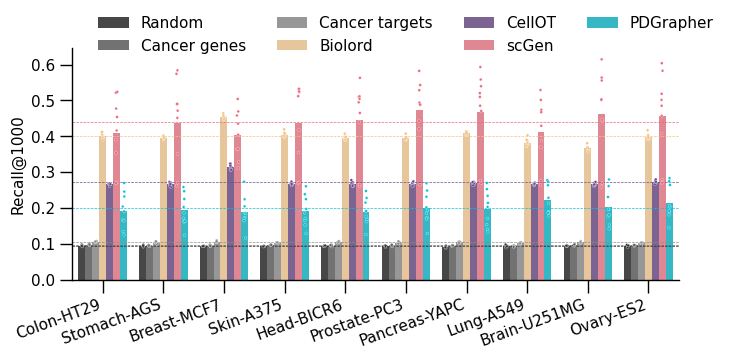

       Cell Line Method_SecondBest  recall@1000_PDGrapher  \
7   Prostate-PC3             scGen               0.199773   
9  Pancreas-YAPC             scGen               0.196595   
6    Breast-MCF7           Biolord               0.188457   
8   Brain-U251MG             scGen               0.201585   
3     Head-BICR6             scGen               0.189150   
0      Skin-A375             scGen               0.191515   
2    Stomach-AGS             scGen               0.193060   
4      Ovary-ES2             scGen               0.215056   
5     Colon-HT29             scGen               0.192226   
1      Lung-A549             scGen               0.221737   

   recall@1000_SecondBest  Absolute Difference  
7                0.472447             0.272674  
9                0.469116             0.272521  
6                0.452544             0.264087  
8                0.461686             0.260101  
3                0.446181             0.257031  
0                0.437285         

In [15]:

# Extract the data for 'rankings' into a DataFrame
for metric in ['recall@1', 'recall@10', 'recall@100', 'recall@1000']:
# for metric in ['recall@1000']:
    data = []
    for cellline, metrics in performance.items():
        if metric in metrics:
            for method, values in metrics[metric].items():
                for value in values:
                    data.append([cellline, method, value])

    # Create a DataFrame
    df = pd.DataFrame(data, columns=['Cell Line', 'Method', metric])

    # Calculate the mean 'rankings' for each cell line and method
    df_mean = df.groupby(['Cell Line', 'Method']).mean().reset_index()

    # Order cell lines based on values for PDGrapher
    pdgrapher_means = df_mean[df_mean['Method'] == 'PDGrapher'].sort_values(by=metric)
    # ordered_cell_lines = pdgrapher_means['Cell Line']

    # Reorder the DataFrame based on ordered cell lines
    df['Cell Line'] = pd.Categorical(df['Cell Line'], categories=ordered_cell_lines, ordered=True)
    df_mean['Cell Line'] = pd.Categorical(df_mean['Cell Line'], categories=ordered_cell_lines, ordered=True)
    #Rename cell lines
    df['Cancer Type'] = df['Cell Line'].map(cell_line_to_cancer_type)
    df_mean['Cancer Type'] = df_mean['Cell Line'].map(cell_line_to_cancer_type)
    # Replace x-axis labels with cancer types
    df['Cell Line'] = df['Cancer Type']
    df_mean['Cell Line'] = df_mean['Cancer Type']
    # Define a color palette that matches the existing figures
    palette = {
        'Biolord': '#f3c283',
        'ChemCPA': '#2C70B9',
        'PDGrapher': '#04C4D9',
        'Cancer genes': '#636363',
        'Cancer targets': '#8C8C8C',
        'CellOT': '#6f4a8e',
        'Random': '#333333',
        'scGen': '#ED697D',
        'GEARS': '#228B22'
    }

    # Define the order of methods
    method_order = ['Random', 'Cancer genes', 'Cancer targets', 'Biolord', 'CellOT', 'scGen', 'PDGrapher']

    with sns.plotting_context(plotting_context):
        # Initialize the plot
        fig, ax = plt.subplots(figsize=(7.35, 3.4))

        # Create a bar plot for each method
        sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)

        # Overlay individual data points
        sns.stripplot(data=df, x='Cell Line', y=metric, hue='Method', palette=palette, dodge=True, jitter=True, alpha=1.0, hue_order=method_order, size=2, edgecolor="white", linewidth=0.2)


        # Add horizontal lines for the overall mean ranking for each method
        for method in method_order:
            overall_mean = df[df['Method'] == method][metric].mean()
            plt.axhline(y=overall_mean, linestyle='--', color=palette[method], linewidth=0.5)

        # Remove title
        plt.title('')
        plt.ylim

        # Remove X-axis label
        plt.xlabel('')
        sns.despine()

        # Adjust legend to only include the bars and place it at the top
        handles, labels = plt.gca().get_legend_handles_labels()
        bar_handles = handles[:len(method_order)]
        bar_labels = labels[:len(method_order)]
        plt.legend(bar_handles, bar_labels, bbox_to_anchor=(0.55, 1.20), loc='upper center', ncol=4, frameon=False, title=None)
        plt.subplots_adjust(right=0.95, bottom = 0.2)
        plt.xticks(rotation=20, ha="right")
        plt.ylabel(metric.capitalize())
        plt.savefig(osp.join(outdir, 'panel_{}.pdf'.format(metric)))
        plt.show()
        plt.close()
        
    df = df_mean

    # Step 1: Filter out the data for PDGrapher
    pdgrapher_df = df[df['Method'] == 'PDGrapher']

    # Step 2: Identify the second-best method for each cell line
    second_best_df = df[df['Method'] != 'PDGrapher'].copy()

    # Group by cell line and find the second best method (highest value)
    second_best_df = second_best_df.sort_values(by=['Cell Line', metric], ascending=False)
    second_best_df = second_best_df.groupby('Cell Line').first().reset_index()

    # Step 3: Merge the two DataFrames to compare PDGrapher with the second-best method
    comparison_df = pd.merge(pdgrapher_df, second_best_df, on='Cell Line', suffixes=('_PDGrapher', '_SecondBest'))

    # Step 4: Calculate the absolute difference
    comparison_df['Absolute Difference'] = abs(comparison_df[metric + '_PDGrapher'] - comparison_df[metric + '_SecondBest'])

    # Display the result
    comparison_df = comparison_df[['Cell Line', 'Method_SecondBest', metric + '_PDGrapher', metric + '_SecondBest', 'Absolute Difference']]
    print(comparison_df.sort_values(by = 'Absolute Difference', ascending = False))

## Panel aggregated recall@k

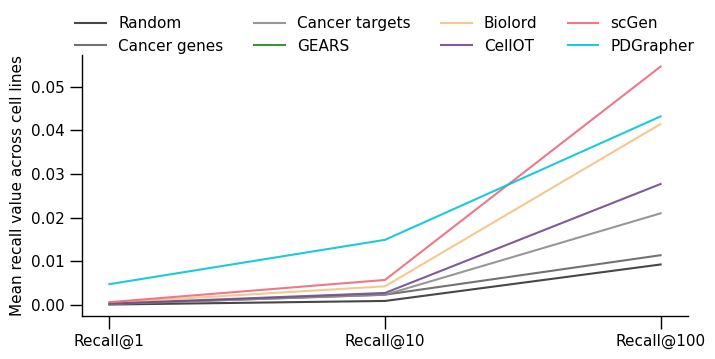

In [44]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize an empty list to store the data
data = []

# Iterate over the performance dictionary to extract all recall metrics
for cellline, metrics in performance.items():
    for metric in ['recall@1', 'recall@10', 'recall@100']:
        if metric in metrics:
            for method, values in metrics[metric].items():
                for value in values:
                    data.append([cellline, metric, method, value])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Cell Line', 'Metric', 'Method', 'Value'])

# Convert the 'Value' column to numeric to avoid any conversion issues
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Calculate the mean for each method and metric across all cell lines
df_mean = df.groupby(['Metric', 'Method'])['Value'].mean().reset_index()



# Define a color palette that matches the existing figures
palette = {
    'Biolord': '#f3c283',
    'ChemCPA': '#2C70B9',
    'PDGrapher': '#04C4D9',
    'Cancer genes': '#636363',
    'Cancer targets': '#8C8C8C',
    'CellOT': '#6f4a8e',
    'Random': '#333333',
    'scGen': '#ED697D',
    'GEARS': '#228B22'
}

# Define the order of methods
method_order = ['Random', 'Cancer genes', 'Cancer targets', 'GEARS', 'Biolord', 'CellOT', 'scGen', 'PDGrapher']
df_mean['Metric'] = [e.capitalize() for e in df_mean['Metric']]
with sns.plotting_context(plotting_context):
    # Initialize the plot
    fig, ax = plt.subplots(figsize=(7.35, 3.4))

    # Create a line plot for each method showing the mean across all cell lines
    sns.lineplot(data=df_mean, x='Metric', y='Value', hue='Method', palette=palette, hue_order=method_order, markers=True, dashes=False, alpha=0.9)

    # Remove X-axis label
    plt.xlabel('')

    sns.despine()

    # Adjust legend to place it at the top
    handles, labels = plt.gca().get_legend_handles_labels()
    line_handles =  handles[:len(method_order)]
    line_labels = labels[:len(method_order)]
    plt.legend(line_handles, line_labels, bbox_to_anchor=(0.5, 1.2), loc='upper center', ncol=4, frameon=False, title=None)
    # plt.subplots_adjust(right=0.95, bottom = 0.2)
    plt.subplots_adjust(right=0.95)
    # plt.xticks(rotation=20, ha="right")
    plt.ylabel('Mean recall value across cell lines')
    plt.savefig(osp.join(outdir, 'aggregated_mean_recall_metrics.pdf'))
    plt.show()


## Panel all metrics ranking

/tmp/ipykernel_1876454/3910177648.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Methods', y='rank', data=df, order=method_order, palette=palette, showfliers=False)


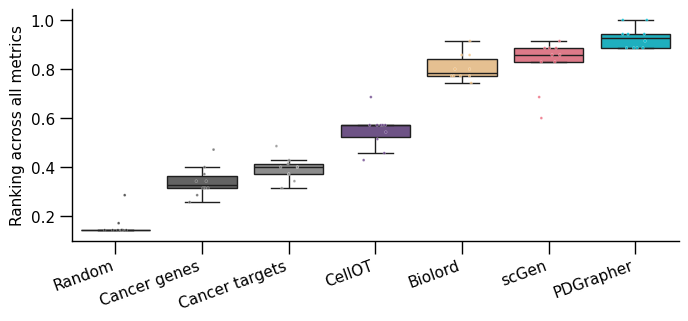

In [45]:
df = pd.read_csv(osp.join(base_path, 'rank_table_genetic_cross.csv'))
df = df.groupby(['Methods', 'Cellline']).mean().reset_index()

# Rename the methods in the 'Methods' column
df['Methods'] = df['Methods'].replace({
    'BL Rand Cancer Genes': 'Cancer genes',
    'BL Rand Cancer Target': 'Cancer targets',
    'BL Rand Random': 'Random',
    'chemCPA': 'ChemCPA',
    'PDgrapher': 'PDGrapher',
    'scGEN': 'scGen'
})

df['rank'] = df['rank']/len(df.Methods.unique())

import matplotlib.pyplot as plt
import seaborn as sns

# Define the custom palette
palette = {
    'Biolord': '#f3c283',
    'ChemCPA': '#2C70B9',
    'PDGrapher': '#04C4D9',
    'Cancer genes': '#636363',
    'Cancer targets': '#8C8C8C',
    'CellOT': '#6f4a8e',
    'Random': '#333333',
    'scGen': '#ED697D',
    'GEARS': '#228B22'
    
}

# Order of methods
# method_order = ['Random', 'Cancer genes', 'Cancer targets', 'ChemCPA', 'CellOT', 'Biolord', 'scGen', 'PDGrapher']
# Calculate the mean rank for each method
mean_rank = df.groupby('Methods')['rank'].mean().reset_index()

# Sort the methods based on mean rank
method_order = mean_rank.sort_values('rank')['Methods'].tolist()


with sns.plotting_context(plotting_context):
    # Initialize the plot
    fig, ax = plt.subplots(figsize=(7.35, 3.4))
    # Create the box plot with method order and custom palette
    sns.boxplot(x='Methods', y='rank', data=df, order=method_order, palette=palette, showfliers=False)

    # Add individual data points with matching colors
    sns.stripplot(x='Methods', y='rank', data=df, hue='Methods', alpha=0.8, hue_order=method_order, palette=palette, edgecolor="white", linewidth=0.2, size=2, jitter=0.15)

    # Remove the legend for the stripplot
    plt.legend([], [], frameon=False)

    # Show the plot
    plt.title('')
    plt.ylabel('Ranking across all metrics')
    plt.xlabel('')
    plt.subplots_adjust(right=0.95, bottom = 0.2)
    plt.xticks(rotation=20, ha="right")
    sns.despine()
    
    plt.savefig(osp.join(outdir, 'panel_all_metrics_ranking.pdf'))
    plt.show()

